In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from utils.parse_csv import Parser
import matplotlib.pyplot as plt
import seaborn as sns
from metrics.RankEval import RankEval
import pandas as pd
import numpy as np

In [9]:
sns.set_style("darkgrid")
sns.set_palette('husl')

In [10]:
parser = Parser()
evaluator = RankEval()

In [11]:
def get_coefs(main_path):
    kendall = [[], []]
    spearman = [[], []]
    hamming = [[], []]
    for i in range(20):
        f_path = f'{main_path}/run{i+1}.csv'
        try:
            r1, r2 = parser.parse_rankings(f_path)
            kendall[0].append(evaluator.aggregate(r1, 'kendall'))
            kendall[1].append(evaluator.aggregate(r2, 'kendall'))
            spearman[0].append(evaluator.aggregate(r1, 'spearman'))
            spearman[1].append(evaluator.aggregate(r2, 'spearman'))
            hamming[0].append(evaluator.aggregate(r1, 'hamming'))
            hamming[1].append(evaluator.aggregate(r2, 'hamming'))
        except:
            print(f'error at: {f_path}')
            kendall[0].append(np.nan)
            kendall[1].append(np.nan)
            spearman[0].append(np.nan)
            spearman[1].append(np.nan)
            hamming[0].append(np.nan)
            hamming[1].append(np.nan)
        

    return kendall, spearman, hamming
            

# Data for gpt-3.5-turbo, rank, Anonymized

In [12]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0'

In [13]:
k35tra, s35tra, h35tra = get_coefs(path)

In [14]:
dfk35tra = pd.DataFrame(k35tra).T
dfk35tra.columns = ['Move 1', 'Move 2']
dfs35tra = pd.DataFrame(s35tra).T
dfs35tra.columns = ['Move 1', 'Move 2']
dfh35tra = pd.DataFrame(h35tra).T
dfh35tra.columns = ['Move 1', 'Move 2']

In [15]:
dfk35tra = dfk35tra.fillna(dfk35tra.mean())
dfs35tra = dfs35tra.fillna(dfs35tra.mean())
dfh35tra = dfh35tra.fillna(dfh35tra.mean())

# Data for gpt-3.5-turbo, rank, explicit

In [16]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0'

In [17]:
k35tre, s35tre, h35tre = get_coefs(path)

In [18]:
dfk35tre = pd.DataFrame(k35tre).T
dfk35tre.columns = ['Move 1', 'Move 2']
dfs35tre = pd.DataFrame(s35tre).T
dfs35tre.columns = ['Move 1', 'Move 2']
dfh35tre = pd.DataFrame(h35tre).T
dfh35tre.columns = ['Move 1', 'Move 2']

In [19]:
dfk35tre = dfk35tre.fillna(dfk35tre.mean())
dfs35tre = dfs35tre.fillna(dfs35tre.mean())
dfh35tre = dfh35tre.fillna(dfh35tre.mean())

# Data for gpt-4, rank, explicit

In [20]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0'

In [21]:
k4re, s4re, h4re = get_coefs(path)

In [22]:
dfk4re = pd.DataFrame(k4re).T
dfk4re.columns = ['Move 1', 'Move 2']
dfs4re = pd.DataFrame(s4re).T
dfs4re.columns = ['Move 1', 'Move 2']
dfh4re = pd.DataFrame(h4re).T
dfh4re.columns = ['Move 1', 'Move 2']

In [23]:
dfk4re = dfk4re.fillna(dfk4re.mean())
dfs4re = dfs4re.fillna(dfs4re.mean())
dfh4re = dfh4re.fillna(dfh4re.mean())

# Data for gpt-4, rank, anonymous

In [24]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0'

In [25]:
k4ra, s4ra, h4ra = get_coefs(path)

error at: /Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/run15.csv


In [26]:
dfk4ra = pd.DataFrame(k4ra).T
dfk4ra.columns = ['Move 1', 'Move 2']
dfs4ra = pd.DataFrame(s4ra).T
dfs4ra.columns = ['Move 1', 'Move 2']
dfh4ra = pd.DataFrame(h4ra).T
dfh4ra.columns = ['Move 1', 'Move 2']

In [27]:
dfk4ra = dfk4ra.fillna(dfk4ra.mean())
dfs4ra = dfs4ra.fillna(dfs4ra.mean())
dfh4ra = dfh4ra.fillna(dfh4ra.mean())

# Plotting

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

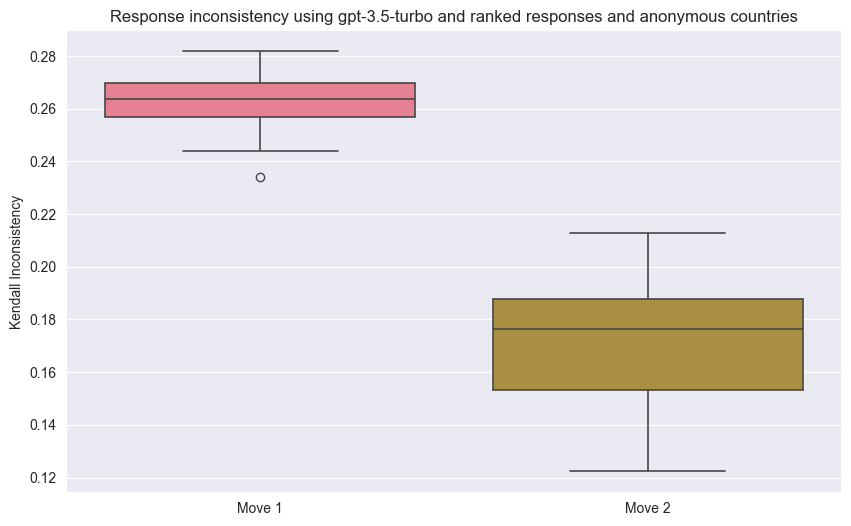

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfk35tra, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

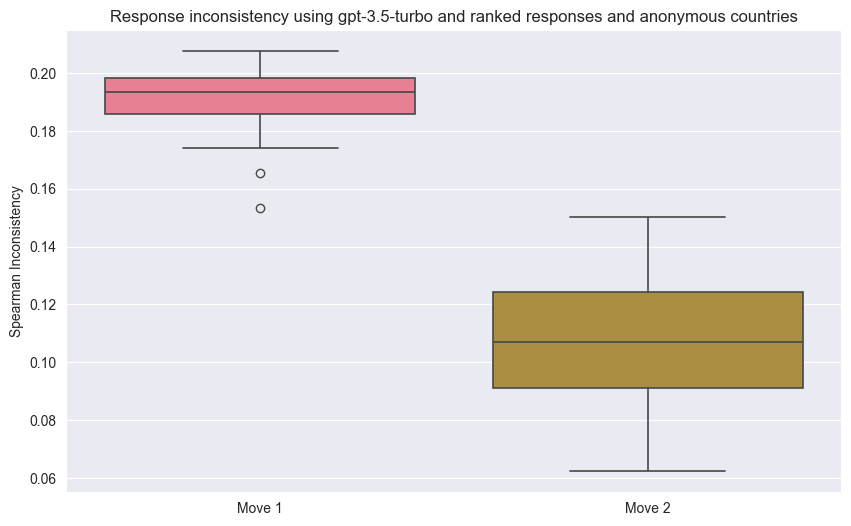

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfs35tra, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

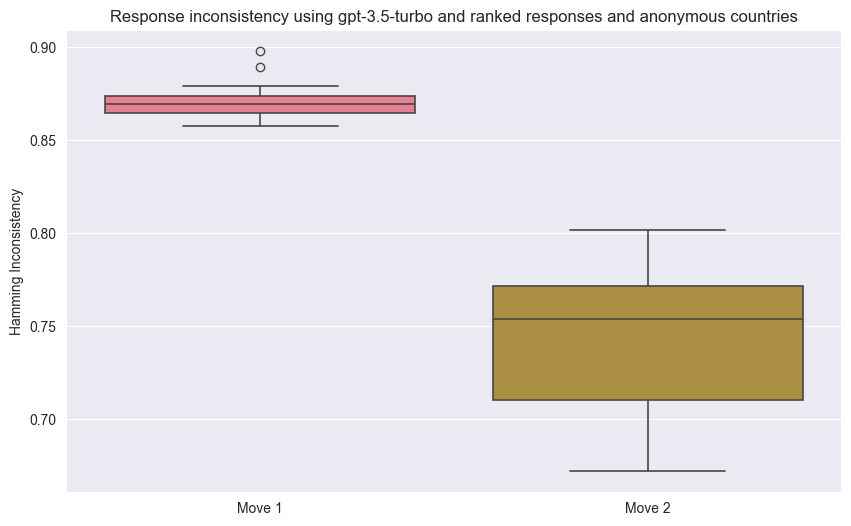

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfh35tra, linewidth=1.2)
plt.ylabel('Hamming Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

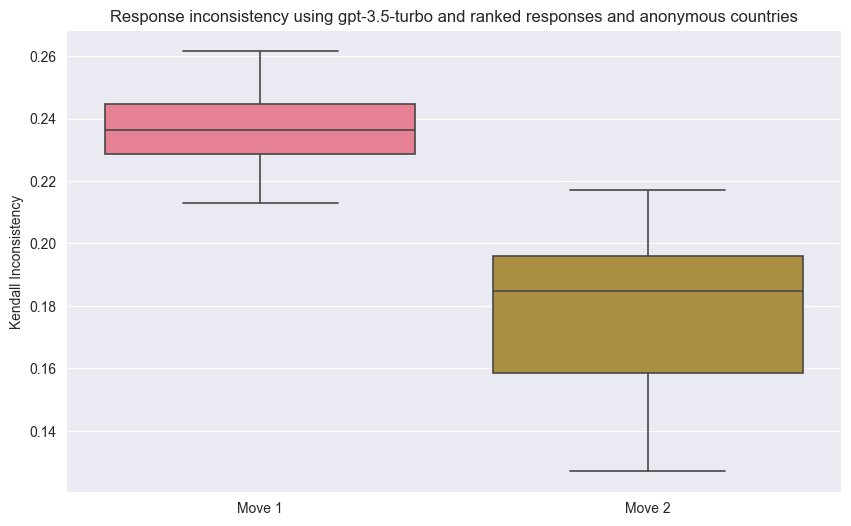

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfk35tre, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

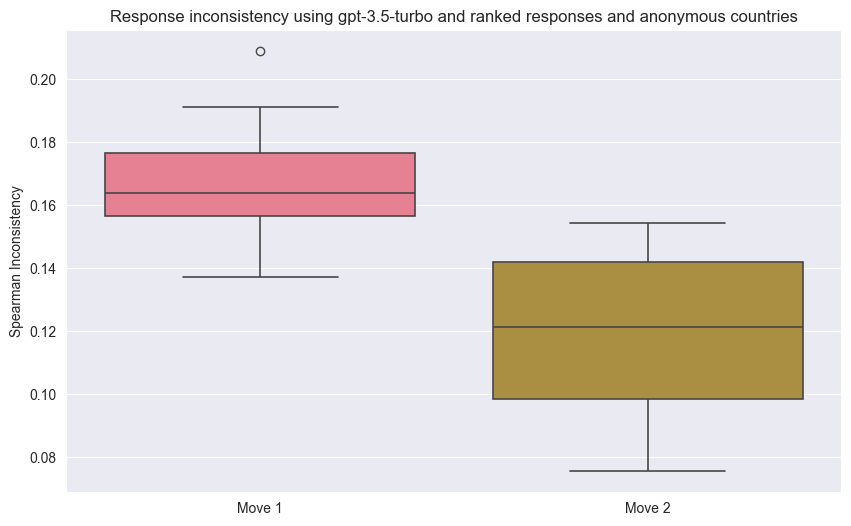

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfs35tre, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

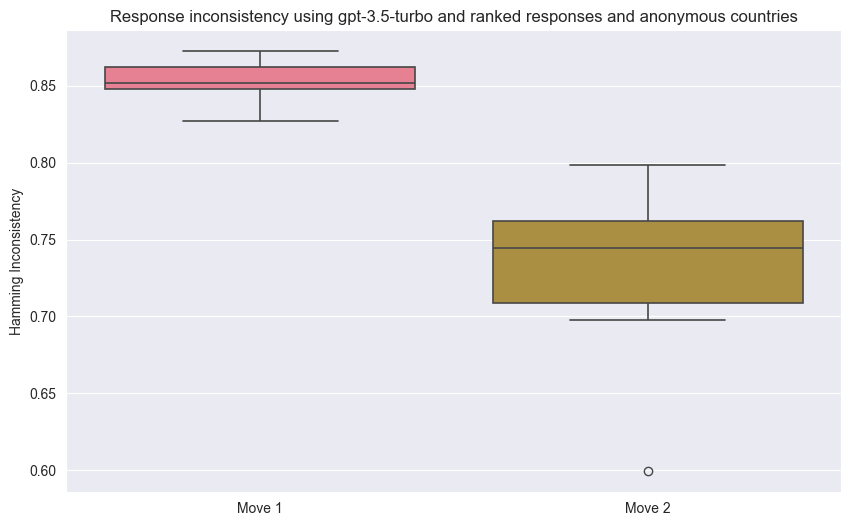

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfh35tre, linewidth=1.2)
plt.ylabel('Hamming Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

In [34]:
kendalls = pd.concat([dfk35tra['Move 1'], dfk35tra['Move 2'], dfk35tre['Move 1'], dfk35tre['Move 2'], dfk4ra['Move 1'], dfk4ra['Move 2'], dfk4re['Move 1'], dfk4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
kendalls.columns = col_names

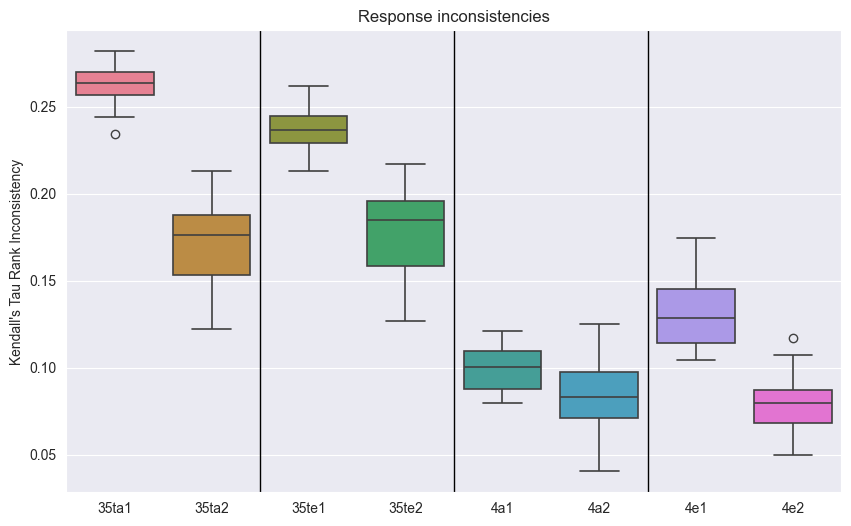

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(kendalls, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

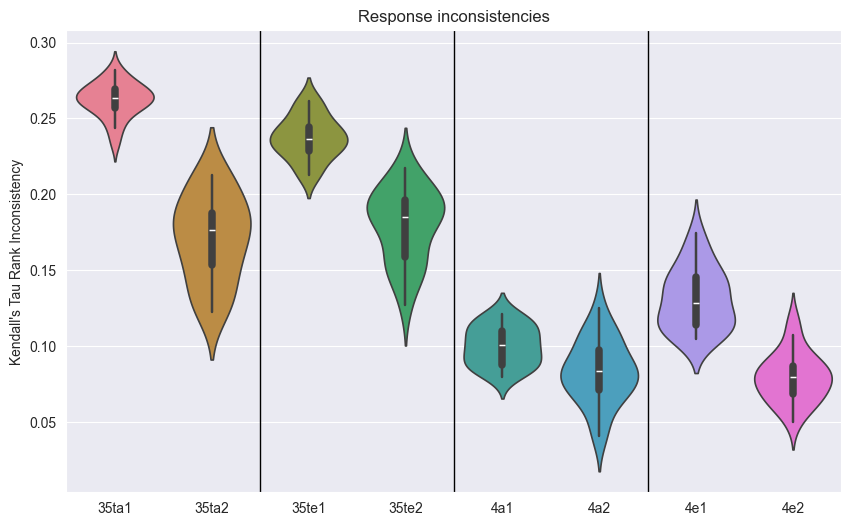

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(kendalls, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [37]:
spearmans = pd.concat([dfs35tra['Move 1'], dfs35tra['Move 2'], dfs35tre['Move 1'], dfs35tre['Move 2'], dfs4ra['Move 1'], dfs4ra['Move 2'], dfs4re['Move 1'], dfs4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
spearmans.columns = col_names

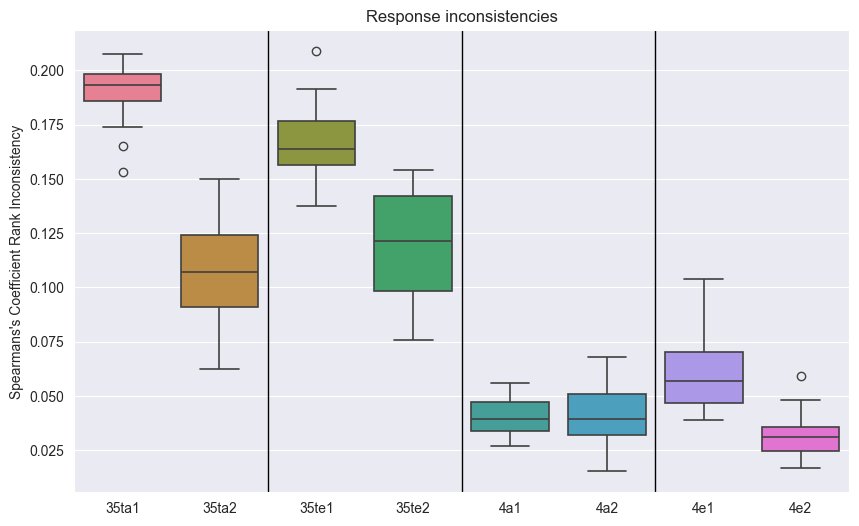

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(spearmans, linewidth=1.2)
plt.ylabel('Spearmans\'s Coefficient Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

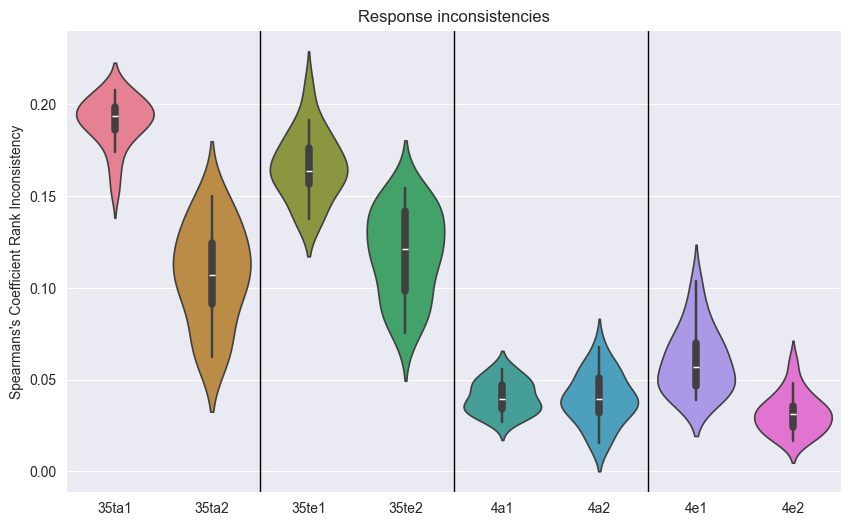

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(spearmans, linewidth=1.2)
plt.ylabel('Spearmans\'s Coefficient Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [40]:
hammings = pd.concat([dfh35tra['Move 1'], dfh35tra['Move 2'], dfh35tre['Move 1'], dfh35tre['Move 2'], dfh4ra['Move 1'], dfh4ra['Move 2'], dfh4re['Move 1'], dfh4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
hammings.columns = col_names

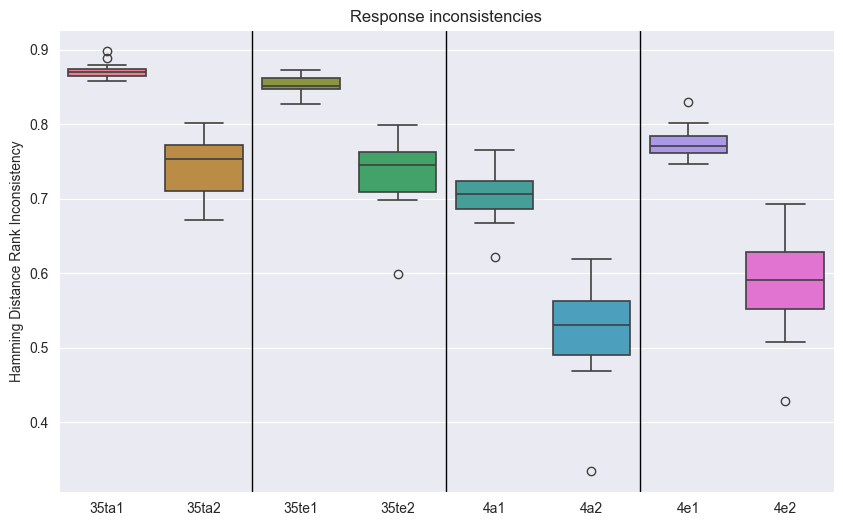

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(hammings, linewidth=1.2)
plt.ylabel('Hamming Distance Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

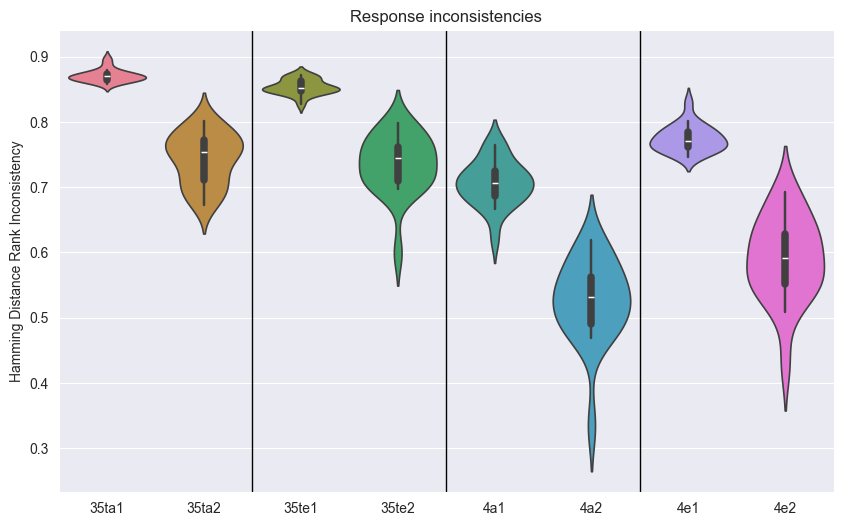

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(hammings, linewidth=1.2)
plt.ylabel('Hamming Distance Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

dfk35tra, dfk35tre, dfk4ra, dfk4re

In [45]:
move1s = pd.concat([dfk35tra['Move 1'], dfk35tre['Move 1'], dfk4ra['Move 1'], dfk4re['Move 1']], axis=1)
move1s.columns = [
    '35t, anon',
    '35t, explicit',
    '4, anon',
    '4, explicit'
]
move1s

,"35t, anon","35t, explicit","4, anon","4, explicit"
0,0.266205,0.250785,0.109110,0.138781
1,0.234226,0.232071,0.116128,0.111665
2,0.270729,0.230317,0.088089,0.140936
3,0.270791,0.227670,0.097076,0.162512
4,0.263004,0.234657,0.119298,0.104494
5,0.277593,0.237119,0.083102,0.106433
6,0.256017,0.228717,0.101385,0.124777
7,0.264143,0.261065,0.108957,0.108279
8,0.259618,0.235488,0.086950,0.114651
9,0.261958,0.212958,0.079624,0.132195


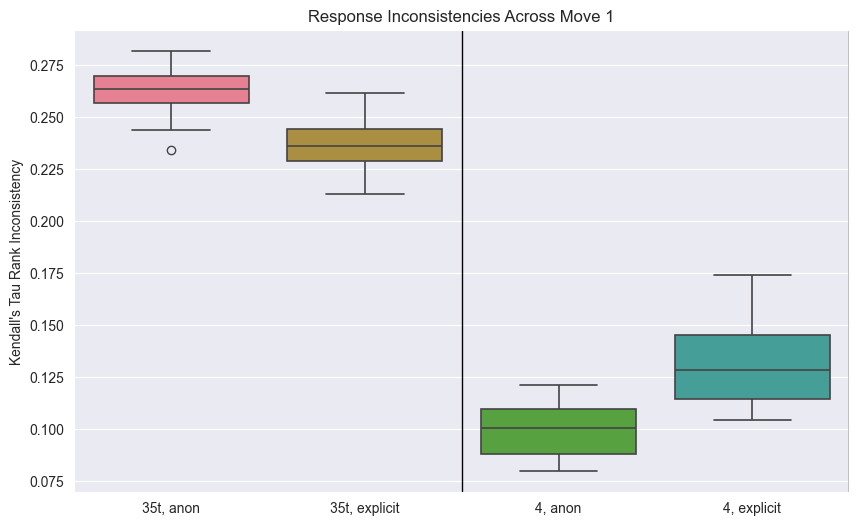

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(move1s, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response Inconsistencies Across Move 1')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

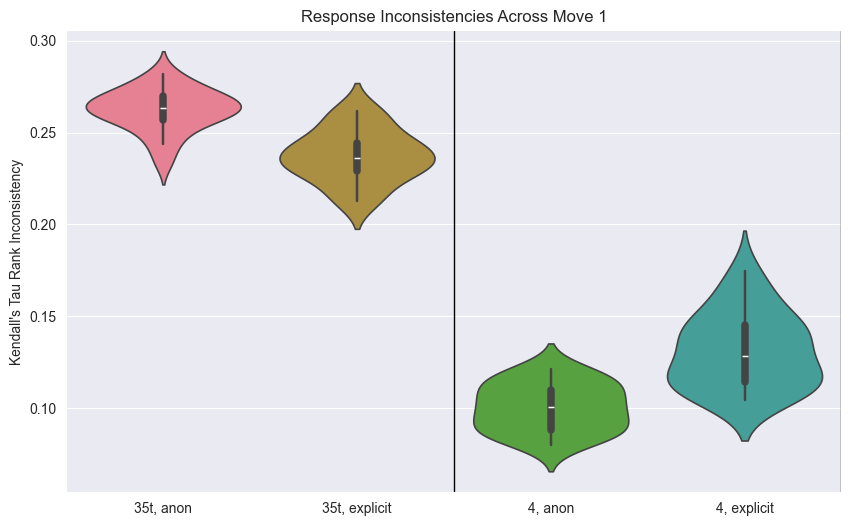

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(move1s, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response Inconsistencies Across Move 1')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [48]:
move2s = pd.concat([dfk35tra['Move 2'], dfk35tre['Move 2'], dfk4ra['Move 2'], dfk4re['Move 2']], axis=1)
move2s.columns = [
    '35t, anon',
    '35t, explicit',
    '4, anon',
    '4, explicit'
]
move2s

,"35t, anon","35t, explicit","4, anon","4, explicit"
0,0.141182,0.154663,0.077408,0.117082
1,0.128163,0.182118,0.047676,0.069221
2,0.159464,0.193536,0.073130,0.074177
3,0.182025,0.159680,0.108556,0.092459
4,0.187658,0.148046,0.086796,0.078393
5,0.122376,0.154663,0.069221,0.061865
6,0.186303,0.186857,0.085411,0.065774
7,0.127054,0.127085,0.063989,0.081625
8,0.178855,0.217144,0.082825,0.082764
9,0.183380,0.195445,0.125115,0.060326


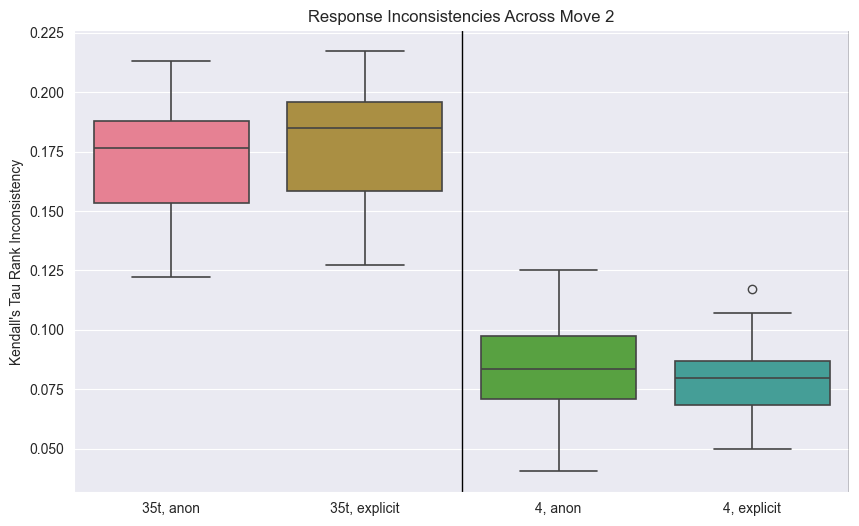

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(move2s, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response Inconsistencies Across Move 2')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

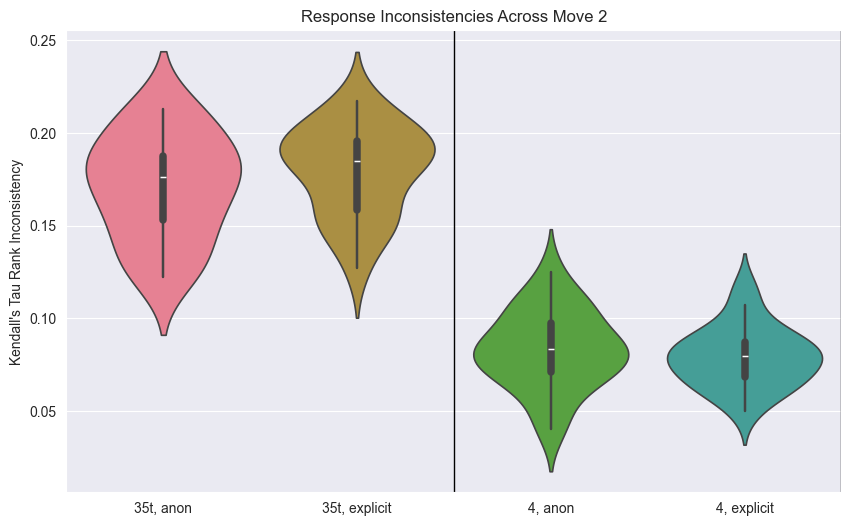

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(move2s, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response Inconsistencies Across Move 2')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)